## Assignment 1: Data Analysis and Machine Learning

### Ky Cuong Pham a1906313

#### How can we use data analytics and Machine Learning to predict energy usage for this house?

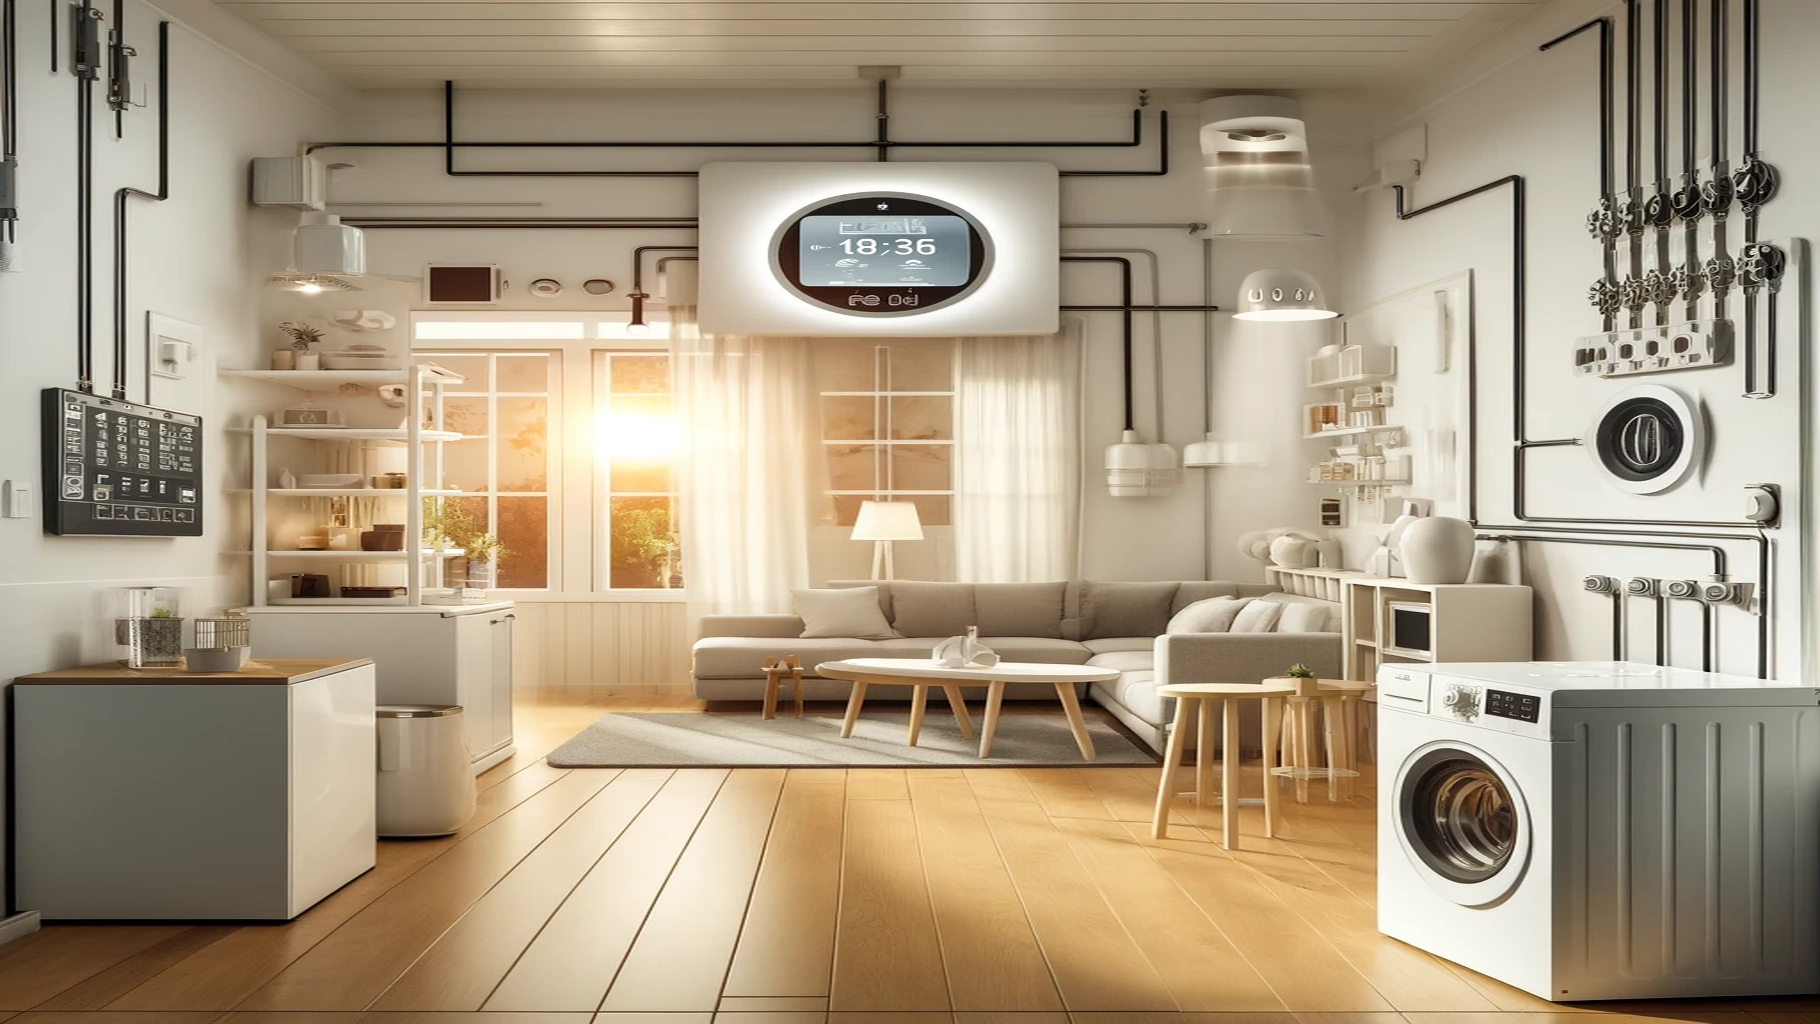

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [3]:
# seed the random numbers for reproducibility 
# do not remove this line
import random 
random.seed(10)

### 1. Analyse and visualise the data

#### 1.1. Read the dataset

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('energydata_complete.csv')

df = data.copy()
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,14/02/2016 0:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
1,14/02/2016 0:10,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2,14/02/2016 0:20,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
3,14/02/2016 0:30,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
4,14/02/2016 0:40,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [39]:
df.shape

(14941, 29)

In [41]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

/tmp/ipykernel_67315/2305678735.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


In [42]:
# Add time-based features
# df['hour'] = df['date'].dt.hour
# df['day_of_week'] = df['date'].dt.day_name()
# df['day_of_week_num'] = df['date'].dt.dayofweek
# df['month'] = df['date'].dt.month
# df['is_weekend'] = df['date'].dt.weekday >= 5
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-02-14 00:00:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,41.00,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,41.06,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2016-02-14 00:20:00,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,41.09,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,41.09,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
2016-02-14 00:40:00,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,41.09,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [9]:
# date time year-month-day hour:minute:second 
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %
# To_out, Temperature outside (from Chievres weather station), in Celsius
# Press_mg_hg, Pressure (from Chievres weather station), in mm Hg
# RH_out, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional

# !!!rv1 and rv2 are just for testing the robustness of the model, it should not rely on these variables
# the model should be able to predict the energy use without these variables
print(f"Shape of the df: {df.shape}")
print(f"Columns in the df: {df.columns}")

Shape of the df: (14941, 28)
Columns in the df: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


#### 1.2. Analyse data characteristics

In [7]:
# Analyse data characteristics (dependencies, distributions, etc.) that may affect the prediction task, and visualise them using suitable techniques and charts. Include required charts, diagrams, tables and discussion in Jupyter Notebook.
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             14941 non-null  datetime64[ns]
 1   Appliances       14941 non-null  int64         
 2   lights           14941 non-null  int64         
 3   T1               14941 non-null  float64       
 4   RH_1             14941 non-null  float64       
 5   T2               14941 non-null  float64       
 6   RH_2             14941 non-null  float64       
 7   T3               14941 non-null  float64       
 8   RH_3             14941 non-null  float64       
 9   T4               14941 non-null  float64       
 10  RH_4             14941 non-null  float64       
 11  T5               14941 non-null  float64       
 12  RH_5             14941 non-null  float64       
 13  T6               14941 non-null  float64       
 14  RH_6             14941 non-null  float

In [8]:
# checking for missing values
df.isnull().sum()

date               0
Appliances         0
lights             0
T1                 0
RH_1               0
T2                 0
RH_2               0
T3                 0
RH_3               0
T4                 0
RH_4               0
T5                 0
RH_5               0
T6                 0
RH_6               0
T7                 0
RH_7               0
T8                 0
RH_8               0
T9                 0
RH_9               0
T_out              0
Press_mm_hg        0
RH_out             0
Windspeed          0
Visibility         0
Tdewpoint          0
rv1                0
rv2                0
hour               0
day_of_week        0
day_of_week_num    0
month              0
is_weekend         0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [43]:
column_mapping = {'T1': 'KITCHEN_TEMP',
    'RH_1': 'KITCHEN_HUM',
    'T2': 'LIVING_TEMP',
    'RH_2' :'LIVING_HUM',
    'T3': 'BEDROOM_TEMP',
    'RH_3':'BEDROOM_HUM',
    'T4' : 'OFFICE_TEMP',
    'RH_4' : 'OFFICE_HUM',
    'T5' : 'BATHROOM_TEMP',
    'RH_5': 'BATHROOM_HUM',
    'T6':'OUTSIDE_TEMP_build',
    'RH_6': 'OUTSIDE_HUM_build',
    'T7': 'IRONING_ROOM_TEMP',
    'RH_7' : 'IRONING_ROOM_HUM',
    'T8' :'TEEN_ROOM_2_TEMP',
    'RH_8' : 'TEEN_ROOM_HUM',
    'T9': 'PARENTS_ROOM_TEMP',
    'RH_9': 'PARENTS_ROOM_HUM',
    'T_out' :'OUTSIDE_TEMP_wstn',
    'RH_out' :'OUTSIDE_HUM_wstn'}

# Rename the columns using the mapping
data.rename(columns=column_mapping, inplace=True)

In [45]:
data.head()

,Appliances,lights,KITCHEN_TEMP,KITCHEN_HUM,LIVING_TEMP,LIVING_HUM,BEDROOM_TEMP,BEDROOM_HUM,OFFICE_TEMP,OFFICE_HUM,...,PARENTS_ROOM_TEMP,PARENTS_ROOM_HUM,OUTSIDE_TEMP_wstn,Press_mm_hg,OUTSIDE_HUM_wstn,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-02-14 00:00:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,41.00,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,41.06,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2016-02-14 00:20:00,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,41.09,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,41.09,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
2016-02-14 00:40:00,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,41.09,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [46]:
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek
data.head(2)

,Appliances,lights,KITCHEN_TEMP,KITCHEN_HUM,LIVING_TEMP,LIVING_HUM,BEDROOM_TEMP,BEDROOM_HUM,OFFICE_TEMP,OFFICE_HUM,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-02-14 00:00:00,50,10,21.79,39.9,20.100000,40.79,21.39,40.59,19.2,41.00,...,2.000000,31.0,2.6,48.320978,48.320978,2,6,0,14,6
2016-02-14 00:10:00,50,0,21.79,39.9,20.033333,40.73,21.39,40.59,19.2,41.06,...,2.166667,28.5,2.6,33.339359,33.339359,2,6,0,14,6


In [47]:
data['lights'].value_counts(normalize=True)

lights
0     0.804163
10    0.095241
20    0.075296
30    0.023626
40    0.001539
50    0.000134
Name: proportion, dtype: float64

In [48]:
data.drop(columns='lights', inplace=True)

In [49]:
#reorder the data for clear vision
desired_order = ['KITCHEN_TEMP','LIVING_TEMP','BEDROOM_TEMP','OFFICE_TEMP','BATHROOM_TEMP','OUTSIDE_TEMP_build','IRONING_ROOM_TEMP','TEEN_ROOM_2_TEMP','PARENTS_ROOM_TEMP','OUTSIDE_TEMP_wstn',
                 'KITCHEN_HUM','LIVING_HUM','BEDROOM_HUM','OFFICE_HUM','BATHROOM_HUM','OUTSIDE_HUM_build','IRONING_ROOM_HUM','TEEN_ROOM_HUM','PARENTS_ROOM_HUM','OUTSIDE_HUM_wstn',
                 "Tdewpoint","Press_mm_hg","Windspeed","Visibility","rv1", "rv2",'month','weekday','hour','week','day','day_of_week',"Appliances"]
#assinging new_data as new name of dataframe
data = data.reindex(columns=desired_order)


Text(0, 0.5, 'Energy Usage (Wh)')

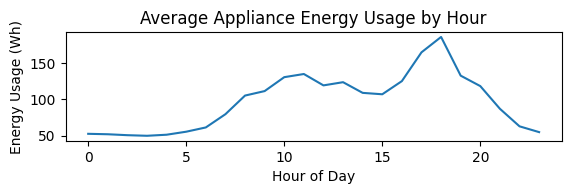

In [17]:
plt.subplot(3, 1, 1)
daily_energy = df.groupby('hour')['Appliances'].mean()
sns.lineplot(x=daily_energy.index, y=daily_energy.values)
plt.title('Average Appliance Energy Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Usage (Wh)')

In [11]:
# around 10 and dinner time 
# late night and morning are the lowest 
# => Useful

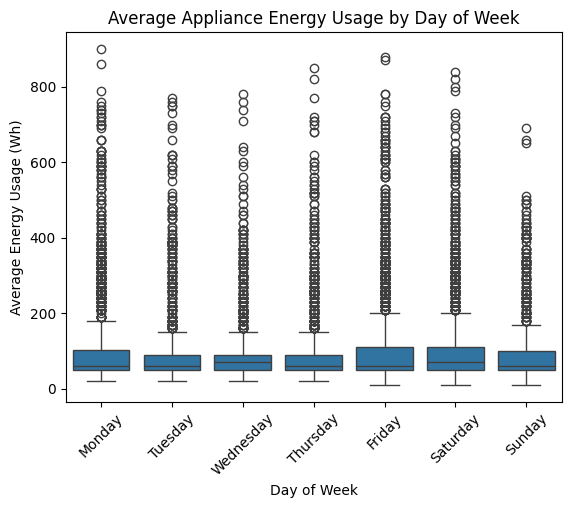

In [19]:
# Average appliance energy usage by day of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = df['day_of_week'].map(lambda x: day_names[x])


# Plot using a bar chart
sns.boxplot(x='day_of_week', y='Appliances', data=df, order=day_names) 
plt.title('Average Appliance Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Usage (Wh)')
plt.xticks(rotation=45)
plt.show()


In [14]:
# weekend a monday are usually used => Useful

Text(0, 0.5, 'Energy Usage (Wh)')

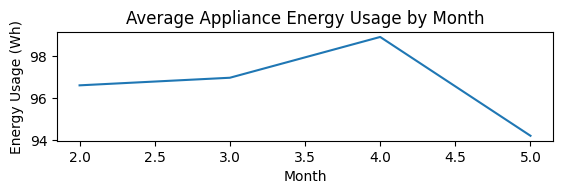

In [15]:
# Monthly pattern
plt.subplot(3, 1, 3)
monthly_energy = df.groupby('month')['Appliances'].mean()
sns.lineplot(x=monthly_energy.index, y=monthly_energy.values)
plt.title('Average Appliance Energy Usage by Month')
plt.xlabel('Month')
plt.ylabel('Energy Usage (Wh)')

In [16]:
#april are the most used => Not sure if it is useful

Text(0.5, 1.0, 'Average Indoor Temperature vs Energy Usage')

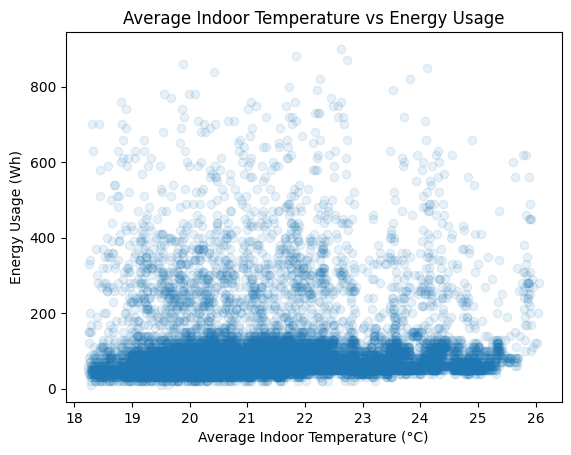

In [17]:
# avarage inside temp impact on energy usage
avg_indoor_temps = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)
plt.scatter(avg_indoor_temps, df['Appliances'], alpha=0.1)
plt.xlabel('Average Indoor Temperature (°C)')
plt.ylabel('Energy Usage (Wh)')
plt.title('Average Indoor Temperature vs Energy Usage')

In [18]:
#Does not show any obvious correlation

Text(0.5, 1.0, 'Indoor vs Outdoor Temperature')

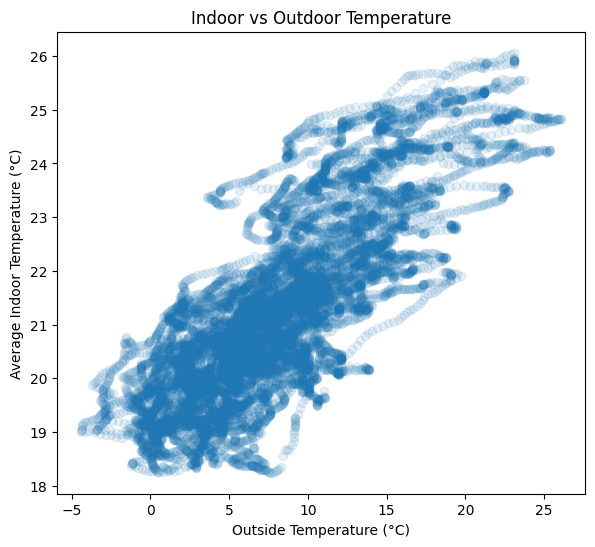

In [19]:
# indoor vs outdoor
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['T_out'], avg_indoor_temps, alpha=0.1)
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Average Indoor Temperature (°C)')
plt.title('Indoor vs Outdoor Temperature')

In [20]:
# indoor and outdoor might be correlated. Higher indoor mean higher outdoor

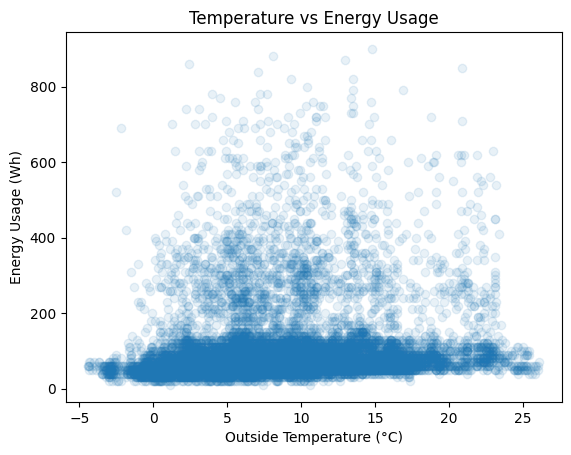

In [21]:

# Outside temp impact on energy usage
plt.scatter(df['T_out'], df['Appliances'], alpha=0.1)
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Energy Usage (Wh)')
plt.title('Temperature vs Energy Usage')
plt.show()

<Figure size 1200x600 with 0 Axes>

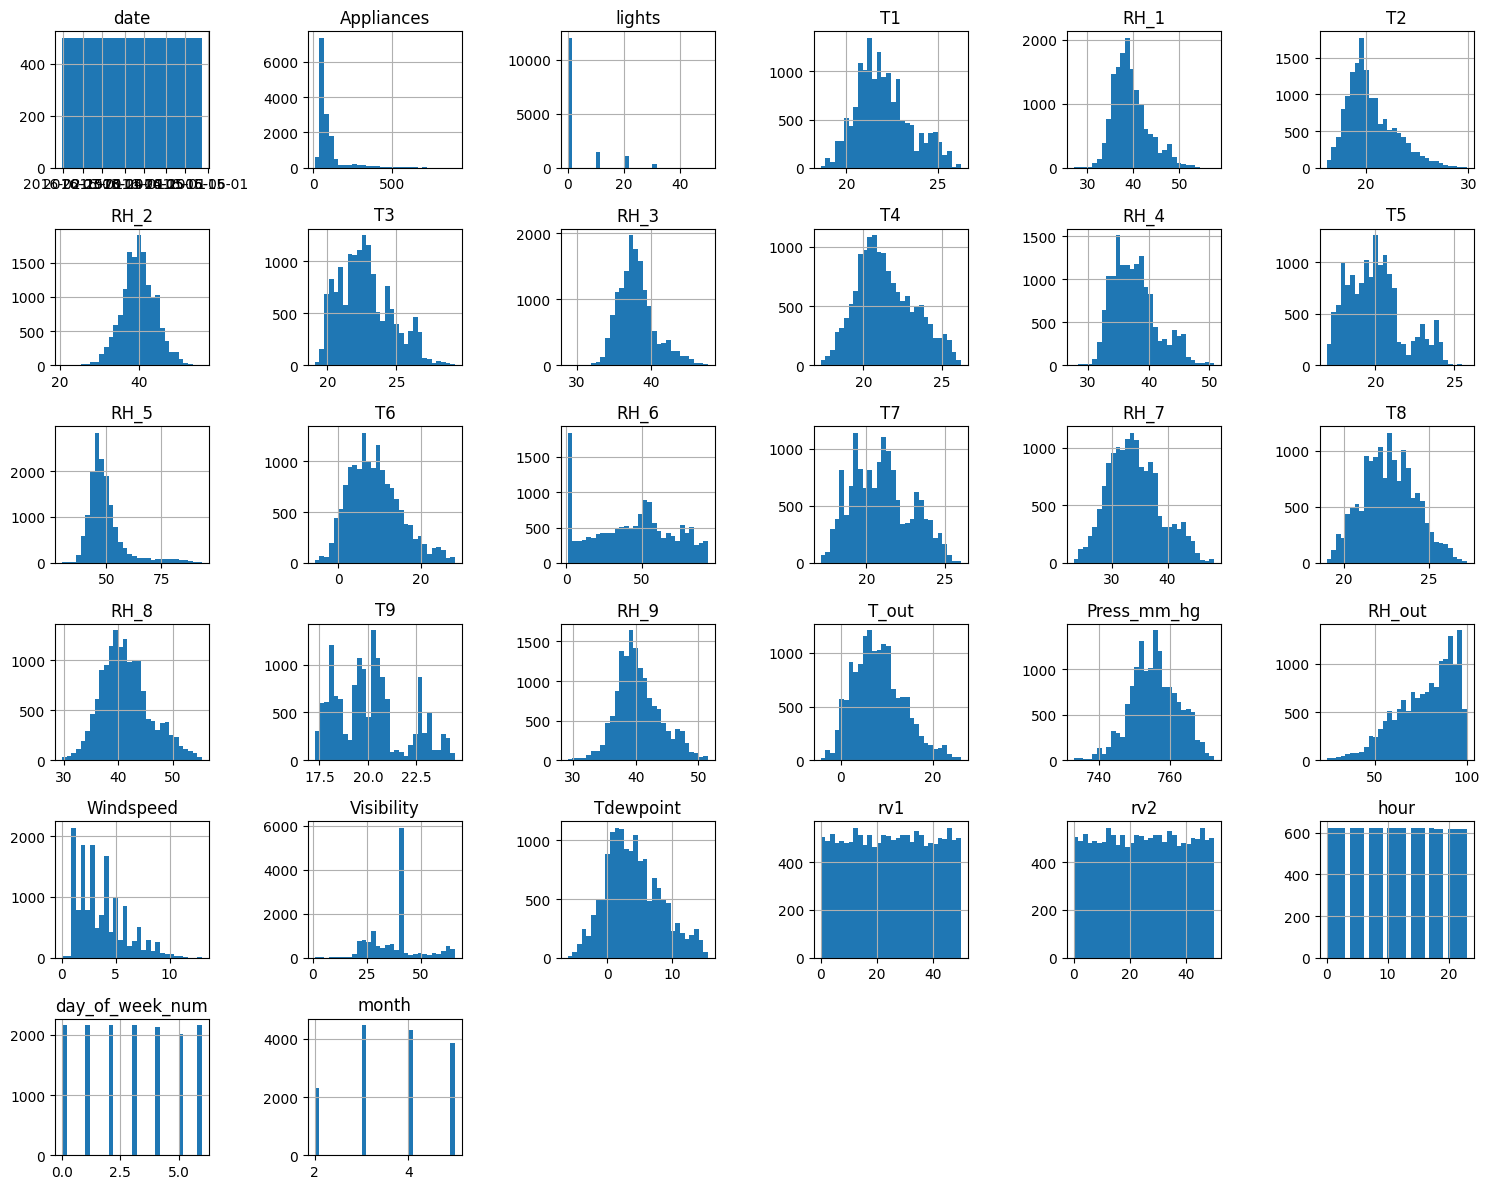

In [22]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [23]:
# some of them are normally distributed, some are not
# some implications for the model:
#1. statistical models assume normal distribution like linear regression might not work well
#2. can use log to normalize the data
#3. Outliers
#4. Need data understanding to decide which model to use
#5. Need to handle skewed data

lights
0     0.804163
10    0.095241
20    0.075296
30    0.023626
40    0.001539
50    0.000134
Name: proportion, dtype: float64

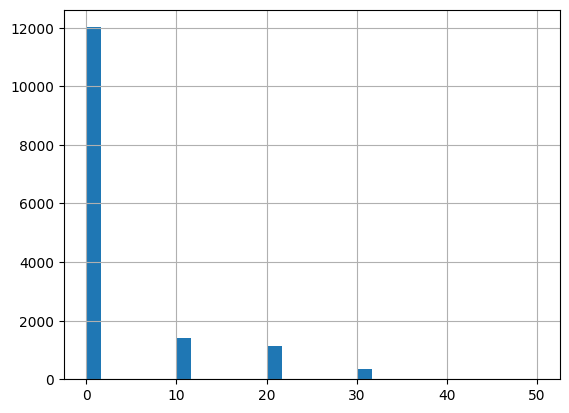

In [24]:
df['lights'].hist(bins=30)

df['lights'].value_counts(normalize=True)

In [25]:
#80% is 0 => useless

In [27]:
#Friday, Saturday Sunday and Monday have higher energy usage, alot of outliers above 200

In [28]:
#does not show nay correlation => Temp might be useless

In [20]:
def analyze_correlations_heatmap(df):
    # Select relevant columns
    temp_cols = [f'T{i}' for i in range(1, 10)]
    humidity_cols = [f'RH_{i}' for i in range(1, 10)]
    weather_cols = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
    random_variable_cols = ['rv1', 'rv2']
    periods_cols = ['hour', 'day_of_week_num', 'month', 'is_weekend']
    
    # Calculate correlations
    cols_to_analyze = ['Appliances', 'lights'] + temp_cols + humidity_cols + weather_cols + random_variable_cols + periods_cols
    corr_matrix = df[cols_to_analyze].corr()
    
    # Plot heatmap with correlation values
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f",
                xticklabels=True, yticklabels=True, annot_kws={"size": 8})
    
    # Customize appearance
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix['Appliances'].sort_values(ascending=False)

corr = analyze_correlations_heatmap(df)


KeyError: "['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'RH_out', 'day_of_week_num', 'is_weekend'] not in index"

In [30]:
# appliance are not strongly correlated with any of the features, indicating non-linear relationship -> need to use non-linear models

In [31]:
# indoor and outdoor doesnt matter that much 

In [32]:
# indoor_temps

In [33]:
# 3. Discuss the results of your analysis and visualisation. Make sure your charts are of good quality and useful, there is no point to make a chart or a table, if it is not referred to in your discussion. 


In [50]:
data.columns


Index(['KITCHEN_TEMP', 'LIVING_TEMP', 'BEDROOM_TEMP', 'OFFICE_TEMP',
       'BATHROOM_TEMP', 'OUTSIDE_TEMP_build', 'IRONING_ROOM_TEMP',
       'TEEN_ROOM_2_TEMP', 'PARENTS_ROOM_TEMP', 'OUTSIDE_TEMP_wstn',
       'KITCHEN_HUM', 'LIVING_HUM', 'BEDROOM_HUM', 'OFFICE_HUM',
       'BATHROOM_HUM', 'OUTSIDE_HUM_build', 'IRONING_ROOM_HUM',
       'TEEN_ROOM_HUM', 'PARENTS_ROOM_HUM', 'OUTSIDE_HUM_wstn', 'Tdewpoint',
       'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1', 'rv2', 'month',
       'weekday', 'hour', 'week', 'day', 'day_of_week', 'Appliances'],
      dtype='object')

In [51]:
data.describe(include='all')

,KITCHEN_TEMP,LIVING_TEMP,BEDROOM_TEMP,OFFICE_TEMP,BATHROOM_TEMP,OUTSIDE_TEMP_build,IRONING_ROOM_TEMP,TEEN_ROOM_2_TEMP,PARENTS_ROOM_TEMP,OUTSIDE_TEMP_wstn,...,Visibility,rv1,rv2,month,weekday,hour,week,day,day_of_week,Appliances
count,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,...,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.00000,0.0,14941.000000,14941.000000,14941.000000
mean,22.030776,20.519140,22.770465,21.425985,20.023137,8.871416,20.938858,22.670173,20.143157,8.182569,...,37.922696,25.047636,25.047636,3.650693,2.978382,11.47875,NaN,16.157352,2.978382,96.747206
std,1.469766,2.322643,1.897689,1.843571,1.779364,6.282378,1.875446,1.554819,1.782497,5.464633,...,11.415145,14.436670,14.436670,1.025445,2.001706,6.91609,NaN,8.372658,2.001706,97.297111
min,18.600000,16.200000,19.100000,17.290000,16.921429,-5.712000,17.100000,19.000000,17.260000,-4.400000,...,1.000000,0.005322,0.005322,2.000000,0.000000,0.00000,NaN,1.000000,0.000000,10.000000
25%,21.000000,18.890000,21.390000,20.100000,18.600000,4.156667,19.390000,21.533333,18.571429,4.230000,...,29.000000,12.593007,12.593007,3.000000,1.000000,5.00000,NaN,9.000000,1.000000,50.000000
50%,21.823333,20.000000,22.566667,21.166667,19.890000,8.166667,20.890000,22.671429,20.000000,7.630000,...,40.000000,25.120708,25.120708,4.000000,3.000000,11.00000,NaN,17.000000,3.000000,60.000000
75%,22.890000,21.830000,24.033333,22.738571,20.890000,12.733333,22.200000,23.733117,20.890000,11.400000,...,40.000000,37.454428,37.454428,5.000000,5.000000,17.00000,NaN,23.000000,5.000000,100.000000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000,...,66.000000,49.992758,49.992758,5.000000,6.000000,23.00000,NaN,31.000000,6.000000,900.000000


### 2. Pre-process the data

In [52]:
#creating new features
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
#data['week'] = data.index.week
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

In [55]:
data.drop(columns='week', inplace=True)

In [56]:
data.head(2)

,KITCHEN_TEMP,LIVING_TEMP,BEDROOM_TEMP,OFFICE_TEMP,BATHROOM_TEMP,OUTSIDE_TEMP_build,IRONING_ROOM_TEMP,TEEN_ROOM_2_TEMP,PARENTS_ROOM_TEMP,OUTSIDE_TEMP_wstn,...,Windspeed,Visibility,rv1,rv2,month,weekday,hour,day,day_of_week,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-02-14 00:00:00,21.79,20.100000,21.39,19.2,18.2,3.530000,19.1,21.79,18.0,2.90,...,2.000000,31.0,48.320978,48.320978,2,6,0,14,6,50
2016-02-14 00:10:00,21.79,20.033333,21.39,19.2,18.2,3.466667,19.1,21.79,18.0,2.87,...,2.166667,28.5,33.339359,33.339359,2,6,0,14,6,50


In [57]:
#reorder the data for clear vision
desired_order = ['KITCHEN_TEMP','LIVING_TEMP','BEDROOM_TEMP','OFFICE_TEMP','BATHROOM_TEMP','OUTSIDE_TEMP_build','IRONING_ROOM_TEMP','TEEN_ROOM_2_TEMP','PARENTS_ROOM_TEMP','OUTSIDE_TEMP_wstn',
                 'KITCHEN_HUM','LIVING_HUM','BEDROOM_HUM','OFFICE_HUM','BATHROOM_HUM','OUTSIDE_HUM_build','IRONING_ROOM_HUM','TEEN_ROOM_HUM','PARENTS_ROOM_HUM','OUTSIDE_HUM_wstn',
                 "Tdewpoint","Press_mm_hg","Windspeed","Visibility","rv1", "rv2",'month','weekday','hour','week','day','day_of_week',"Appliances"]
#assinging new_data as new name of dataframe
data = data.reindex(columns=desired_order)

In [58]:
data.tail(2)

,KITCHEN_TEMP,LIVING_TEMP,BEDROOM_TEMP,OFFICE_TEMP,BATHROOM_TEMP,OUTSIDE_TEMP_build,IRONING_ROOM_TEMP,TEEN_ROOM_2_TEMP,PARENTS_ROOM_TEMP,OUTSIDE_TEMP_wstn,...,Visibility,rv1,rv2,month,weekday,hour,week,day,day_of_week,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:50:00,25.5,25.414000,26.890000,24.7,23.2,22.433333,24.5,24.6625,23.2,22.3,...,26.166667,6.322784,6.322784,5,4,17,NaN,27,4,420
2016-05-27 18:00:00,25.5,25.264286,26.823333,24.7,23.2,21.026667,24.5,24.7360,23.2,22.2,...,27.000000,34.118851,34.118851,5,4,18,NaN,27,4,430


ValueError: List of boxplot statistics and `positions` values must have same the length

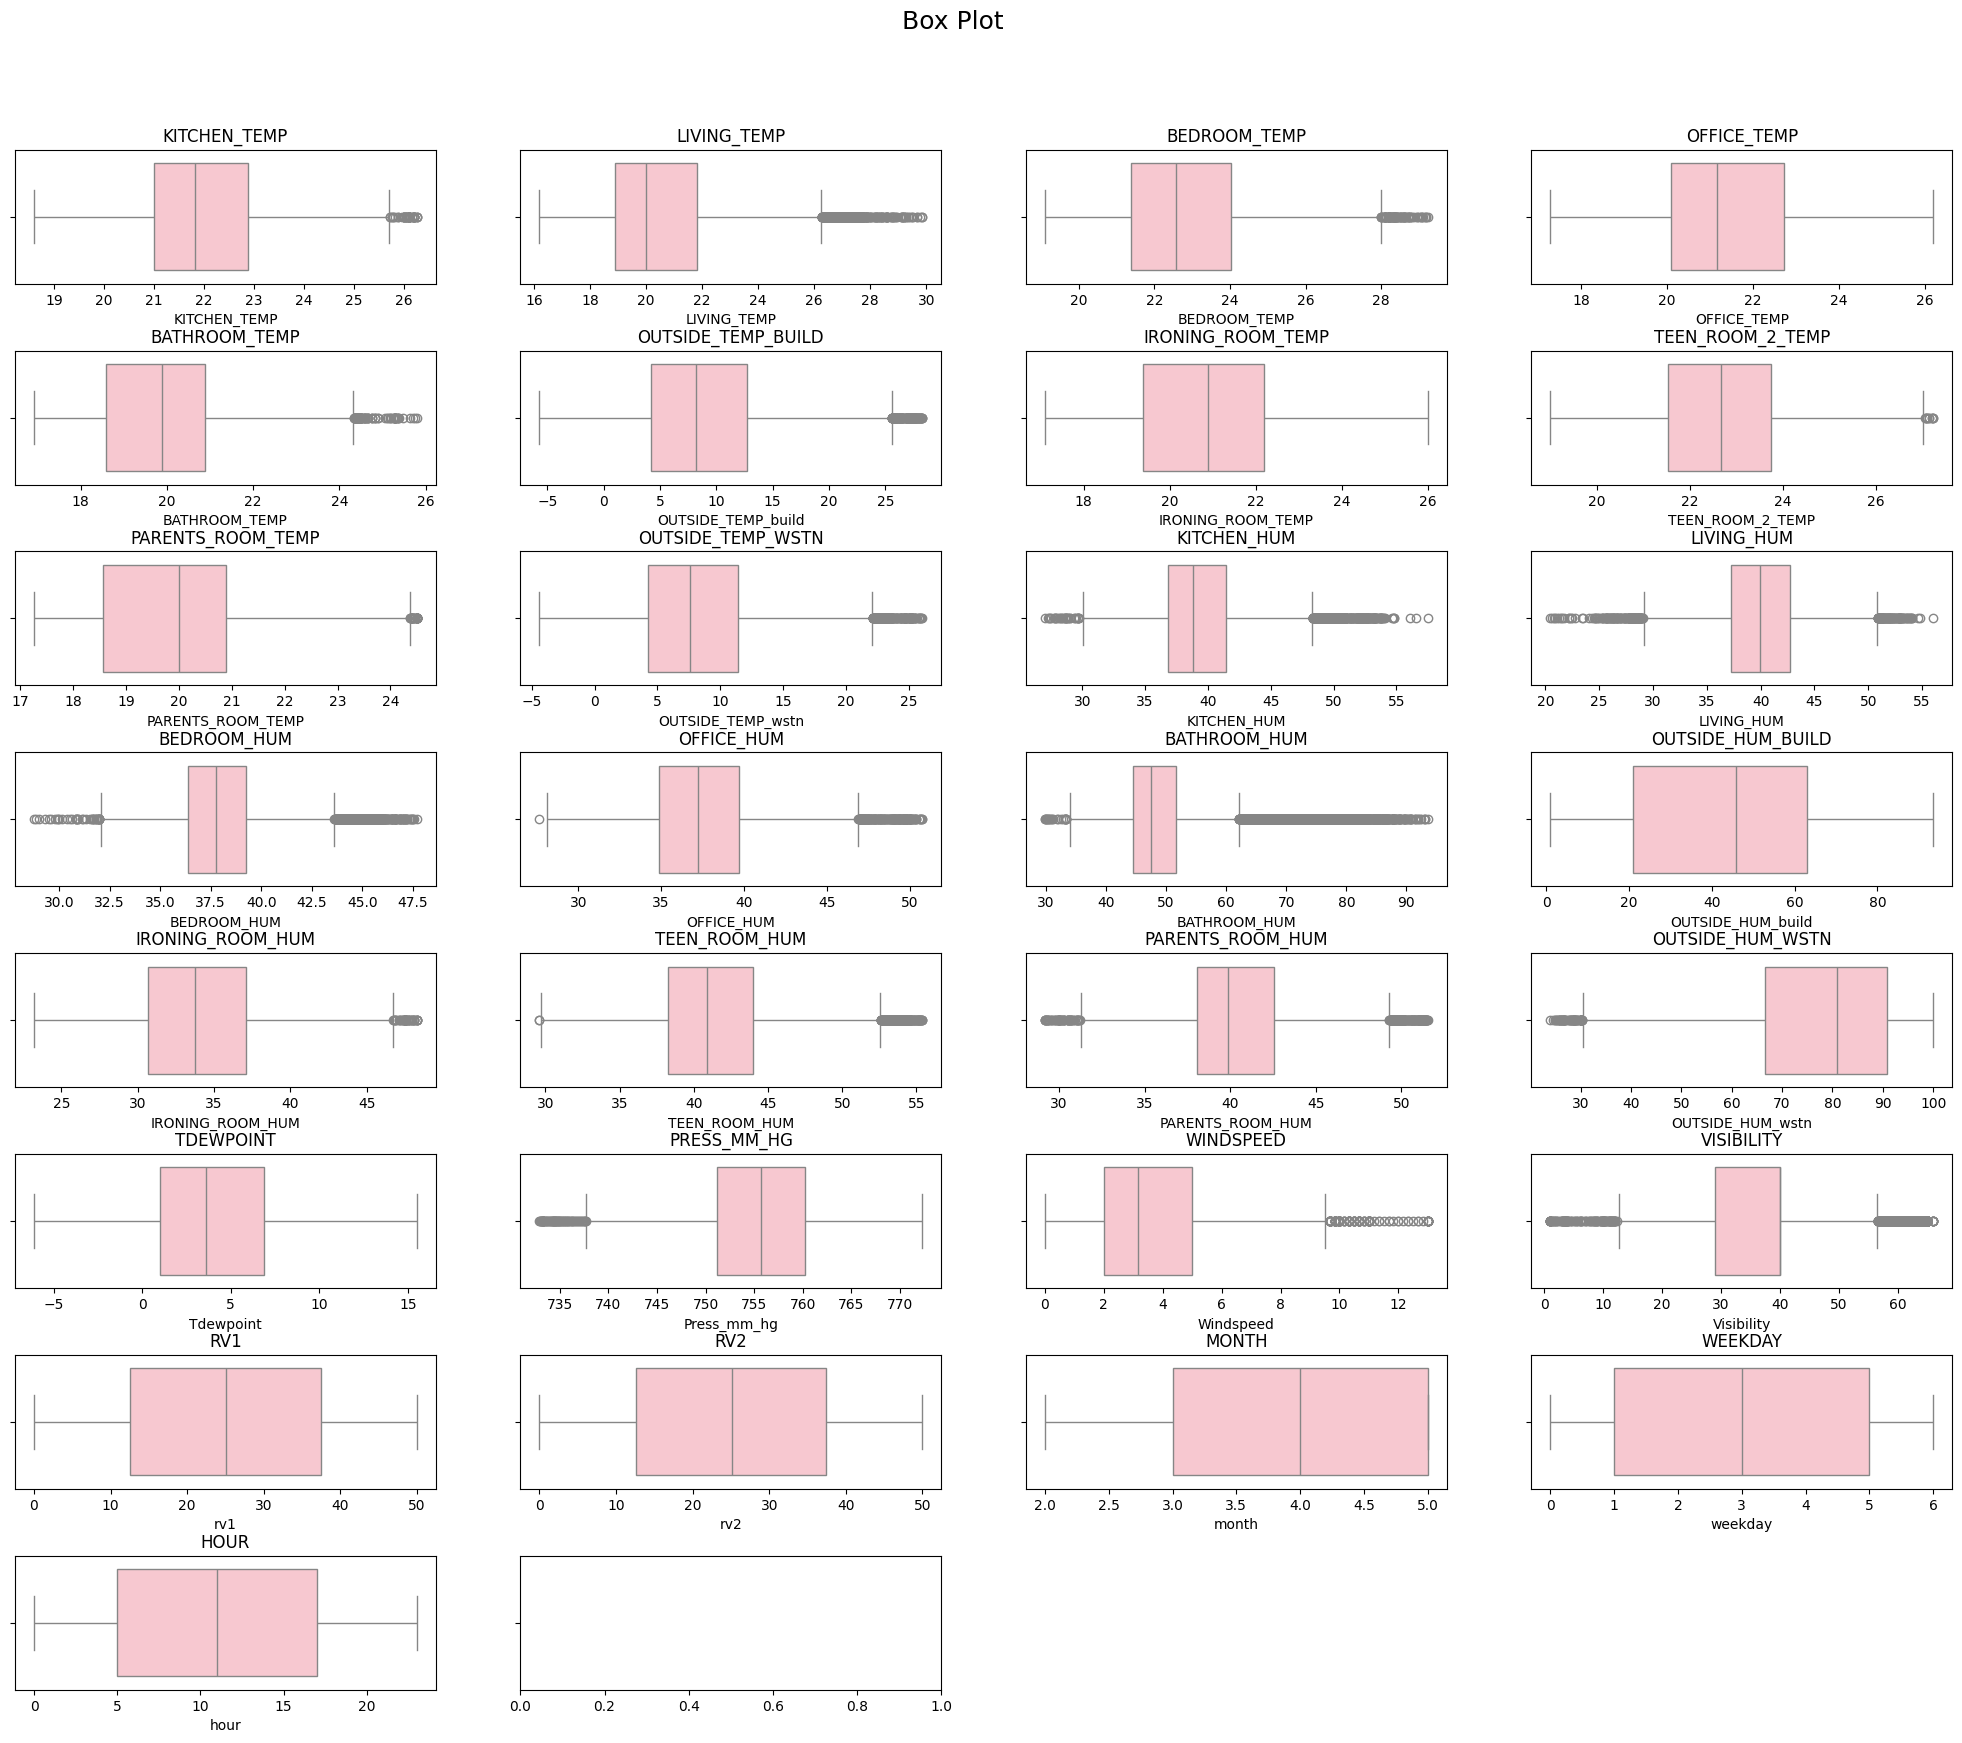

In [61]:
# Handling Outliers & Outlier treatments
df= data.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())


In [60]:
data.columns

Index(['KITCHEN_TEMP', 'LIVING_TEMP', 'BEDROOM_TEMP', 'OFFICE_TEMP',
       'BATHROOM_TEMP', 'OUTSIDE_TEMP_build', 'IRONING_ROOM_TEMP',
       'TEEN_ROOM_2_TEMP', 'PARENTS_ROOM_TEMP', 'OUTSIDE_TEMP_wstn',
       'KITCHEN_HUM', 'LIVING_HUM', 'BEDROOM_HUM', 'OFFICE_HUM',
       'BATHROOM_HUM', 'OUTSIDE_HUM_build', 'IRONING_ROOM_HUM',
       'TEEN_ROOM_HUM', 'PARENTS_ROOM_HUM', 'OUTSIDE_HUM_wstn', 'Tdewpoint',
       'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1', 'rv2', 'month',
       'weekday', 'hour', 'week', 'day', 'day_of_week', 'Appliances'],
      dtype='object')

In [62]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(data)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))



Number of outliers per column:
Visibility            1670
Appliances            1519
BATHROOM_HUM          1065
BEDROOM_HUM            623
KITCHEN_HUM            448
LIVING_TEMP            354
OUTSIDE_TEMP_wstn      252
TEEN_ROOM_HUM          243
PARENTS_ROOM_HUM       238
LIVING_HUM             226
Windspeed              197
OFFICE_HUM             183
OUTSIDE_TEMP_build     140
BEDROOM_TEMP            87
BATHROOM_TEMP           80
Press_mm_hg             76
OUTSIDE_HUM_wstn        66
IRONING_ROOM_HUM        50
KITCHEN_TEMP            49
PARENTS_ROOM_TEMP       39
TEEN_ROOM_2_TEMP        11
OUTSIDE_HUM_build        0
IRONING_ROOM_TEMP        0
OFFICE_TEMP              0
Tdewpoint                0
rv1                      0
rv2                      0
weekday                  0
month                    0
hour                     0
week                     0
day                      0
day_of_week              0
dtype: int64


In [63]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

KITCHEN_TEMP 

Percentiles: 25th=21.000, 75th=22.890, IQR=1.890

lower = 18.165 and upper = 25.725 
 
Identified outliers: 49
KITCHEN_TEMP Outliers Removed

-------

LIVING_TEMP 

Percentiles: 25th=18.890, 75th=21.830, IQR=2.940

lower = 14.480000000000004 and upper = 26.239999999999995 
 
Identified outliers: 354
LIVING_TEMP Outliers Removed

-------

BEDROOM_TEMP 

Percentiles: 25th=21.390, 75th=24.033, IQR=2.643

lower = 17.425000005 and upper = 27.998333325000004 
 
Identified outliers: 87
BEDROOM_TEMP Outliers Removed

-------

OFFICE_TEMP 

Percentiles: 25th=20.100, 75th=22.739, IQR=2.639

lower = 16.142142855000003 and upper = 26.696428575 
 
Identified outliers: 0

-------

BATHROOM_TEMP 

Percentiles: 25th=18.600, 75th=20.890, IQR=2.290

lower = 15.165000000000003 and upper = 24.325 
 
Identified outliers: 80
BATHROOM_TEMP Outliers Removed

-------

OUTSIDE_TEMP_build 

Percentiles: 25th=4.157, 75th=12.733, IQR=8.577

lower = -8.708333327500002 and upper = 25.598333324500004 


ValueError: List of boxplot statistics and `positions` values must have same the length

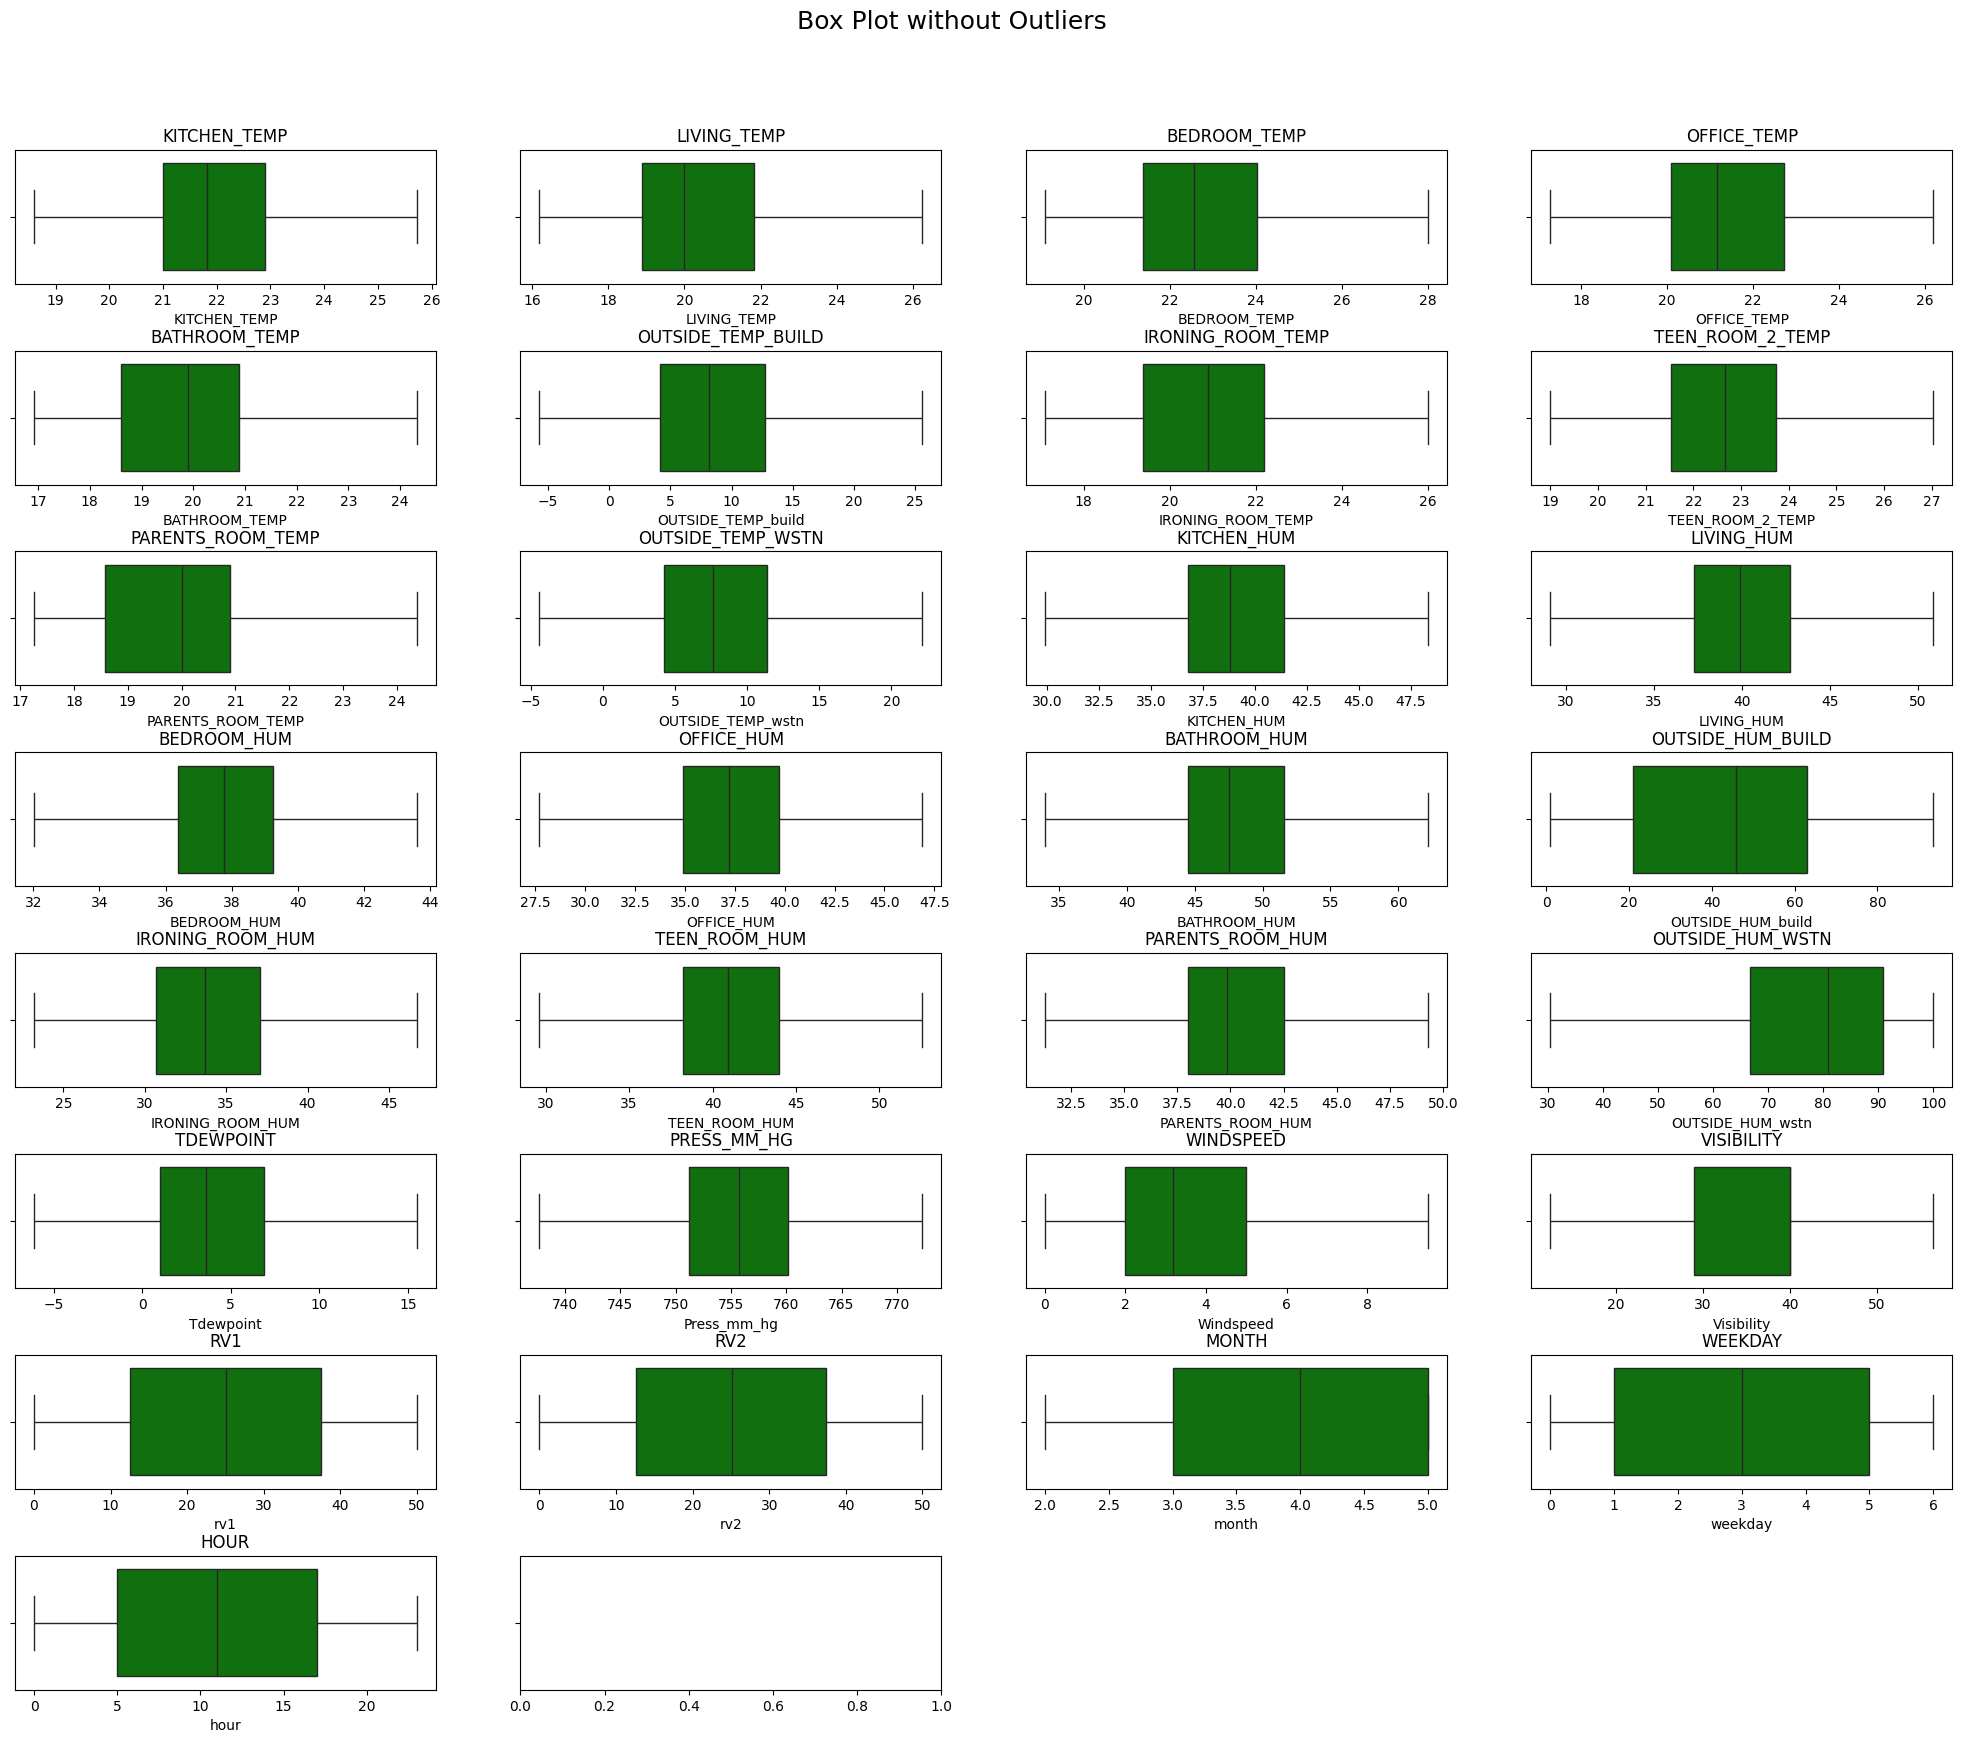

In [64]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())


In [35]:
data['Average_building_Temperature'] = data[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)
data['Temperature_difference']=abs(data['Average_building_Temperature']-data['T_out'])

data['Average_building_humidity']=data[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)
data['Humidity_difference']=abs(data['RH_out']-data['Average_building_humidity'])

columns_to_drop = ['rv1','rv2']
data.drop(columns_to_drop, axis=1, inplace=True)

### 3. Implement, train and select prediction models

In [37]:
data

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,lights,Average_building_Temperature,Temperature_difference,Average_building_humidity,Humidity_difference
0,2016-02-14 00:00:00,50.0,21.790000,39.900000,20.100000,40.790000,21.390000,40.590000,19.2,41.000000,...,737.7,98.000000,2.000000,31.000000,2.6,0.0,19.946250,17.046250,42.250417,55.749583
1,2016-02-14 00:10:00,50.0,21.790000,39.900000,20.033333,40.730000,21.390000,40.590000,19.2,41.060000,...,737.7,98.166667,2.166667,28.500000,2.6,0.0,19.937917,17.067917,42.311736,55.854931
2,2016-02-14 00:20:00,60.0,21.700000,39.933333,19.890000,40.790000,21.390000,40.530000,19.2,41.090000,...,737.7,98.333333,2.333333,26.000000,2.6,0.0,19.901875,17.071875,42.391042,55.942292
3,2016-02-14 00:30:00,40.0,21.633333,39.860000,19.890000,40.790000,21.390000,40.590000,19.2,41.090000,...,737.7,98.500000,2.500000,23.500000,2.6,0.0,19.887778,17.087778,42.455417,56.044583
4,2016-02-14 00:40:00,60.0,21.600000,39.900000,19.790000,40.790000,21.390000,40.590000,19.1,41.090000,...,737.7,98.666667,2.666667,21.000000,2.6,0.0,19.860139,17.090139,42.518681,56.147986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,2016-05-27 17:20:00,100.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,755.2,55.666667,3.333333,23.666667,13.3,0.0,24.869583,2.714583,46.137881,9.528786
14937,2016-05-27 17:30:00,90.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,755.2,56.000000,3.500000,24.500000,13.3,0.0,24.846810,2.691810,46.089286,9.910714
14938,2016-05-27 17:40:00,175.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,755.2,56.333333,3.666667,25.333333,13.3,0.0,24.818571,2.663571,46.237738,10.095595
14939,2016-05-27 17:50:00,175.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,755.2,56.666667,3.833333,26.166667,13.2,0.0,24.758312,2.603312,46.242246,10.424421


In [36]:
skewness = data.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = data[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = data[skewed_features]
print(skewed_features)

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'

In [36]:
# drop random variables as it does not look like that much important while predicting the output
columns_to_drop = ['rv1','rv2', 'day_of_week', 'lights']
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
df.shape

(14941, 34)

In [38]:
#Spliting
train_dev_size = int(len(df) * 0.75)

dev_size = int(train_dev_size*0.8)

df_train_dev = df.iloc[:train_dev_size] # first 75% of the data
df_test = df.iloc[train_dev_size:] # remaining 25% of the data

df_train = df_train_dev.iloc[:dev_size] 
df_dev = df_train_dev.iloc[dev_size:]

X_train = df_train.drop(columns=['Appliances', 'date'])
y_train = df_train['Appliances']

X_dev = df_dev.drop(columns=['Appliances', 'date'])
y_dev = df_dev['Appliances']

X_test = df_test.drop(columns=['Appliances', 'date'])
y_test = df_test['Appliances']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_dev shape: {X_dev.shape}")
print(f"y_dev shape: {y_dev.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8964, 32)
y_train shape: (8964,)
X_dev shape: (2241, 32)
y_dev shape: (2241,)
X_test shape: (3736, 32)
y_test shape: (3736,)


In [58]:
X_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Visibility,Tdewpoint,hour,day_of_week_num,month,is_weekend,avg_indoor_temp,avg_indoor_humidity,temp_diff,humidity_diff
0,21.790000,39.900000,20.100000,40.79,21.390000,40.590000,19.2,41.00,18.200000,52.000000,...,31.000000,2.60,0,6,2,True,19.946250,42.250417,17.046250,55.749583
1,21.790000,39.900000,20.033333,40.73,21.390000,40.590000,19.2,41.06,18.200000,52.015000,...,28.500000,2.60,0,6,2,True,19.937917,42.311736,17.067917,55.854931
2,21.700000,39.933333,19.890000,40.79,21.390000,40.530000,19.2,41.09,18.200000,52.090000,...,26.000000,2.60,0,6,2,True,19.901875,42.391042,17.071875,55.942292
3,21.633333,39.860000,19.890000,40.79,21.390000,40.590000,19.2,41.09,18.188889,52.090000,...,23.500000,2.60,0,6,2,True,19.887778,42.455417,17.087778,56.044583
4,21.600000,39.900000,19.790000,40.79,21.390000,40.590000,19.1,41.09,18.161111,52.090000,...,21.000000,2.60,0,6,2,True,19.860139,42.518681,17.090139,56.147986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,22.000000,41.700000,19.600000,45.09,24.133333,39.900000,21.7,40.20,20.790000,50.626667,...,27.833333,7.35,5,5,4,True,21.675417,43.252083,12.455417,44.914583
8960,21.890000,41.730000,19.600000,45.20,24.133333,39.900000,21.7,40.26,20.790000,50.560000,...,27.666667,7.40,5,5,4,True,21.657917,43.264583,12.427917,45.068750
8961,21.890000,41.790000,19.600000,45.20,24.133333,39.900000,21.7,40.29,20.790000,50.500000,...,27.500000,7.45,5,5,4,True,21.657917,43.275833,12.407917,45.224167
8962,21.890000,41.790000,19.566667,45.23,24.200000,39.900000,21.7,40.29,20.790000,50.400000,...,27.333333,7.50,5,5,4,True,21.654583,43.275000,12.384583,45.391667


In [39]:
from sklearn.preprocessing import StandardScaler

# Scale the data (Fit only on Train, then transform Dev & Test)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

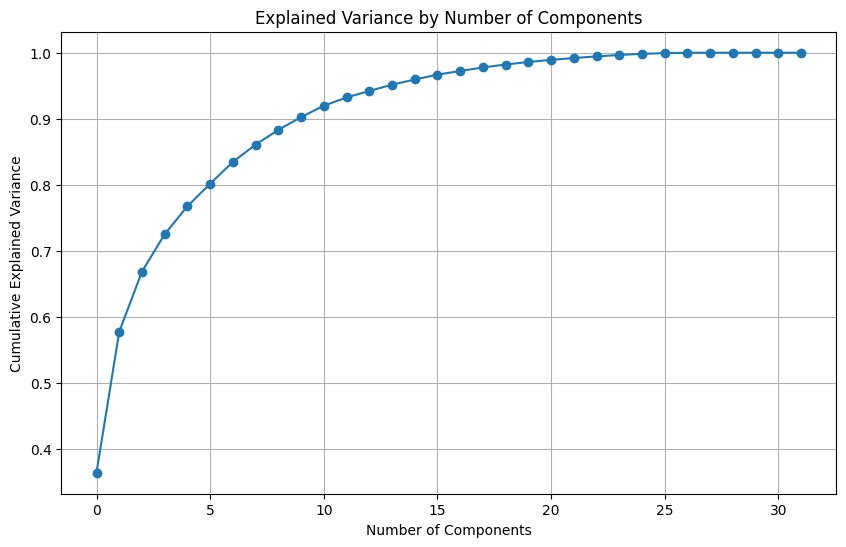

In [40]:
import numpy as np
from sklearn.decomposition import PCA

# Choose the number of components for PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plot the explained variance ratio to determine the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [41]:
# choose 10 components as it is the elbow point

n_components = 10
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_dev_pca = pca.transform(X_dev_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_dev_pca shape: {X_dev_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (8964, 10)
X_dev_pca shape: (2241, 10)
X_test_pca shape: (3736, 10)


### 4. Test the final model and analyse results

#### Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(trained_model, X, y):
    y_pred = trained_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    return mse, r2

In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_train_acc = lr_model.score(X_train_scaled, y_train)
print(f"Linear Regression Training Accuracy: {lr_train_acc}")

lr_mse, lr_r2 = evaluate_model(lr_model, X_dev_scaled, y_dev)

Linear Regression Training Accuracy: 0.3175690205041829
MSE: 1401.5357852642687
R2 Score: 0.16831536060471175


In [56]:
from sklearn import svm

svm_model = svm.SVR(gamma='scale')
svm_model.fit(X_train_scaled, y_train)

svm_train_acc = svm_model.score(X_train_scaled, y_train)
print(f"SVM Training Accuracy: {svm_train_acc}")

svm_mse, svm_r2 = evaluate_model(svm_model, X_dev_scaled, y_dev)


SVM Training Accuracy: 0.2690953487790819
MSE: 1598.622529107161
R2 Score: 0.051362215914467324


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_train_scaled, y_train)

rf_train_acc = rf_model.score(X_train_scaled, y_train)
print(f"Random Forest Training Accuracy: {rf_train_acc}")

rf_mse, rf_r2 = evaluate_model(rf_model, X_dev_scaled, y_dev)

Random Forest Training Accuracy: 0.9663969745196138
MSE: 1189.4455879071843
R2 Score: 0.294171697034211


### 5. Reflection

Follow the guidelines in the assignment specification


### 6. References

### 7. Appendix

Use this section as needed for longer analysis and expanded charting